# Research of the Video Games Markets for Online Store

The study is based on historical data up to 2016. The data contains information about the title, release year, platform, number of sales by region, as well as information about the ratings and ratings of games.

The purpose of this study is:

- explore of the videogame market at main sales regions
- research the dynamics of the release of new games
- research the life cycles of world gaming platforms
- gaming platforms forecast for 2017
- analysis of the impact of user and critic ratings on game sales
- compiling a user profile for each of the main regions
    - the most popular platforms and genres for each of the regions
    - impact of age rating on game sales by region
- testing various hypotheses  

At first we will conduct a general review of the data. We'll consider the nature and quality of the available data. Are there duplicates and omissions and other features. Next, we will carry out preprocessing, where we will study each column of data for the presence of anomalies, duplicates and so on. If possible, we'll fill in gaps based on the situation.  

Next, we calculate and add additional data for the study to the dataset. In particular, the number of sales for each game.  
We will study and describe these and other parameters, after which we will be able to complete the tasks.

### Reading and exploring data

In [1]:
# importing of neccesary libraries and modules
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats as st

sns.set(rc={'figure.figsize':(14, 8)}, palette='Set2', font_scale=1.25)

In [2]:
# Reading file into df variable
df = pd.read_csv('datasets/games.csv')

Let's display the first 10 lines of the dataset and general information about the available data.

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


The names of the columns and their designation:

- Name - the name of the game
- Platform - platform name
- Year_of_Release - year of release
- Genre - game genre
- NA_sales - sales in North America (millions of copies sold)
- EU_sales - sales in Europe (millions of copies sold)
- JP_sales - sales in Japan (millions of copies sold)
- Other_sales - sales in other countries (millions of copies sold)
- Critic_Score - Critics score (maximum 100)
- User_Score - user rating (maximum 10)
- Rating — rating from the ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.

And size of dataset

In [4]:
df.shape

(16715, 11)

There are 16715 rows and 11 columns in the table

Then let's see the general info from the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


From the information presented in the table, it can be seen that there are data gaps in some columns. Column names should be converted to lower case. Also, the data types in the 'year_of_release' columns should be changed to integer, and 'critic_score' and 'user_score' to fractional.

Let's inspect the number of gaps in each of the columns.

In [6]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

There are dew gaps in 'name' and 'genre' columns. There are also 269 gaps in the 'year_of_release' column, which is less than 2% of the total data. In the 'critic_score', 'user_score' and 'rating' columns, the number of gaps is significant - from 40 to 50% values are absent.

#### Conclusion

The dataset has gaps in six columns. Some columns have incorrect data types. Two columns contain incorrect data types.

In general, at first glance, the data should be sufficient for the study. More precisely, it will be possible to say after pre-processing and analysis.

## Data preprocessing

### Changing the format of dataset column names

Converting columns names to lower case.

In [7]:
df.columns = df.columns.str.lower()

### Checking for duplicates

Explicit duplicates check

In [8]:
df.duplicated().sum()

0

There are no explicit duplicates.

Let's look at the 'genre', 'platform' and 'rating' columns for implicit duplicates.

In [9]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [10]:
df['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [11]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

No implicit duplicates found.

### Data gaps processing and data types converting

#### 'name' column

Exploring gaps in 'name' column.

In [12]:
df[df['genre'].isna()].head(50)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


#### 'genre' column

This data is also missing values in the 'genre' column. Since there is very little such data, it would be better to drop it.

In [13]:
df.dropna(subset=['genre'], how='any', inplace=True)

Let's look at the number of gaps in the 'year_of_release' column

#### 'year_of_release' column

In [14]:
df['year_of_release'].isna().sum()

269

Since the number of gaps is small (less than 2% of the data), it would be more correct for the study to delete these rows.

In [15]:
df.dropna(subset=['year_of_release'], how='any', inplace=True)

Let's replace the data type with an integer one, because the year should be expressed in whole numbers.

In [16]:
df['year_of_release'] = df['year_of_release'].astype('Int64')

#### 'user_score' column

When changing the data type in the 'user_score' column, the error "ValueError: could not convert string to float. The data contains data of string type. Consider the occurring values in the 'user_score' column.

In [17]:
df['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

There are some str-type values 'tbd' and nan values also.

Counting the number of 'tbd' values

In [18]:
df[df['user_score'] == 'tbd']['user_score'].count()

2376

And nan values

In [19]:
len(df[df['user_score'].isna()])

6605

There are quite a lot of such values, more than 10% of 'tbd' values and 6605 of nan values. TBD - in this case, most likely means To Be Determined. Perhaps in the database where the dataset was taken from, there was not enough data on the rating of users. In fact, 'tbd' is equivalent to NaN in our case. Let's replace the 'tbd' with nan values. It is better not to fill in the gaps themselves, because even if we'll fill it with some values it can distort the results of the study.

In [20]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = None

Now we can change the data type in the 'user_score' column to float.

In [21]:
df['user_score'] = df['user_score'].astype('float')

#### 'rating' column

Let's replace the gaps in the column with ratings with 'na' (not available), so we can take into account the missing values in further research. There is also an assumption that such omissions may mean the absence of such a rating (that is, no rating was assigned).

In [22]:
df['rating'] = df['rating'].fillna('na')

#### Creating 'global_sales' column

Let's create a column in the data to display global sales.

In [23]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

### Conclusions

During the data preprocessing, the following work was performed:

- Changed the format of data column names to lowercase
- Checked the dataset for explicit and implicit duplicates
- Data rows with gaps in columns 'name', 'genre' and 'year_of_release' have been removed
- Anomaly values found in column 'user_score'
- For the gaps in the remaining columns, it was decided to leave the gaps as they are.
- Data types have been changed for two columns
- Data gaps have been filled in the game rating column
- The values of global sales for each of the games were calculated and added to the dataset

## Exploratory data analysis

### Analysis of the number of released games by years

Let's explore the distribution of the number of released games depending on the year.

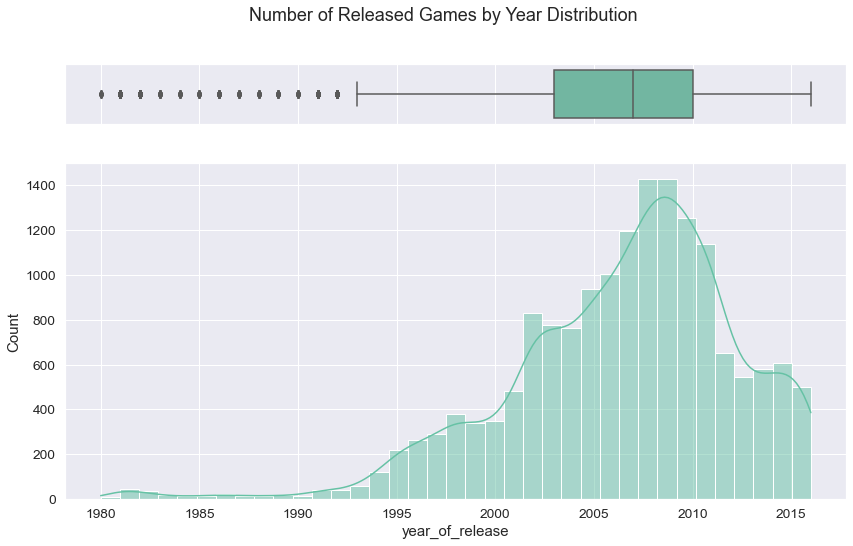

In [24]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(data=df, x='year_of_release', ax=ax_box)
sns.histplot(df['year_of_release'], bins=37, kde=True, ax=ax_hist)
ax_box.set(xlabel='')

fig.suptitle('Number of Released Games by Year Distribution')
plt.show()

The histogram shows that until about 1995, the number of released games is much less than the same period in the subsequent period. Let's apply more precise methods to study this parameter.

In [25]:
df['year_of_release'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

According to the data, we can say that the largest number of games were released in 2006-2007. And 95% of all games were released after 1994.

### Platform Life Cycle Research

To study the life cycle of the platform, we decided to take data for the period starting from 1994, since the vast majority of games were released after 1994.

In [26]:
# Displaing the top 20 results in descending order of global sales.
df[df['year_of_release'] >= 1994].groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(20)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       252.66
XB       251.57
N64      218.01
GC       196.73
XOne     159.32
GB       152.08
SNES      84.67
WiiU      82.19
PSV       53.81
SAT       33.59
Name: total_sales, dtype: float64

Let's explore the distribution by number of games for all platforms with total sales of 250 million copies or more.

In [27]:
top_platforms = df[df['year_of_release'] >= 1994].groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(12)

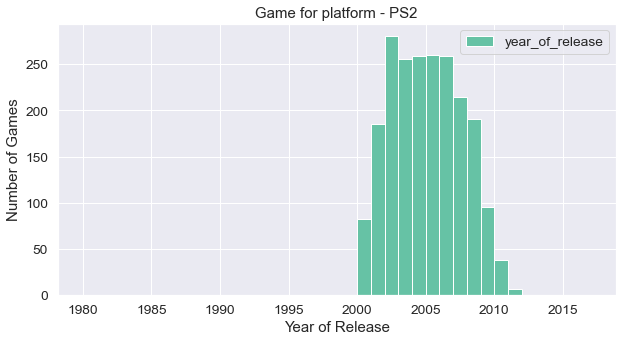

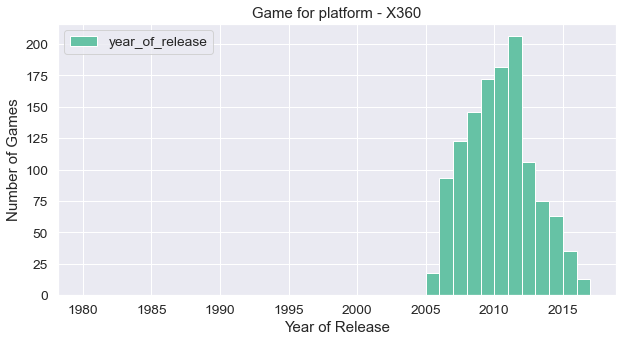

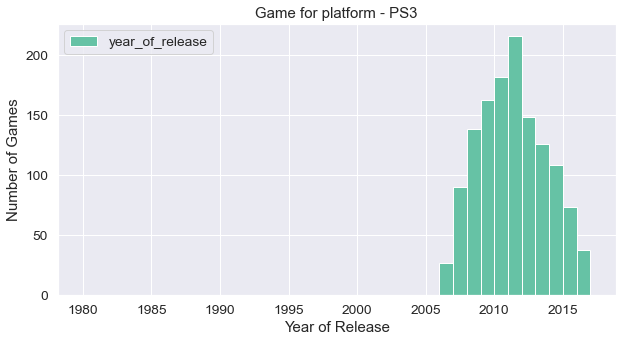

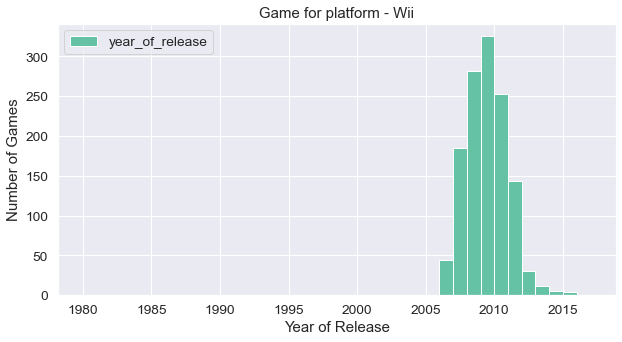

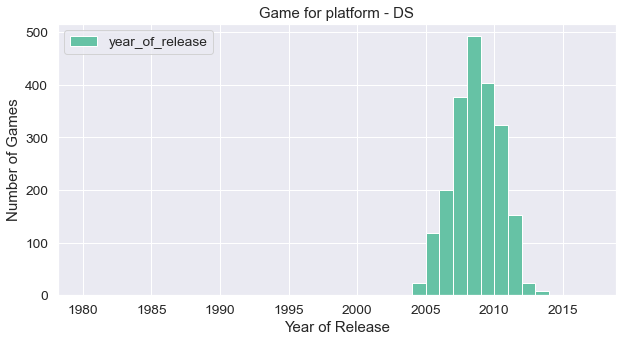

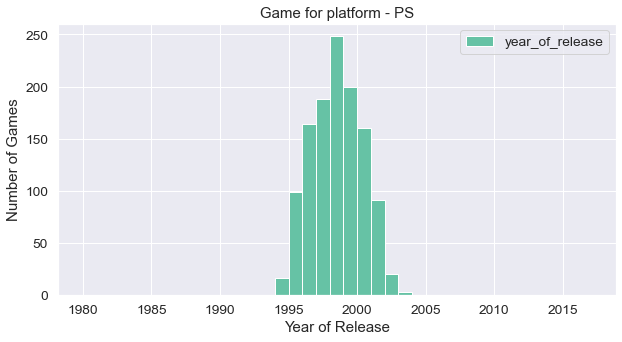

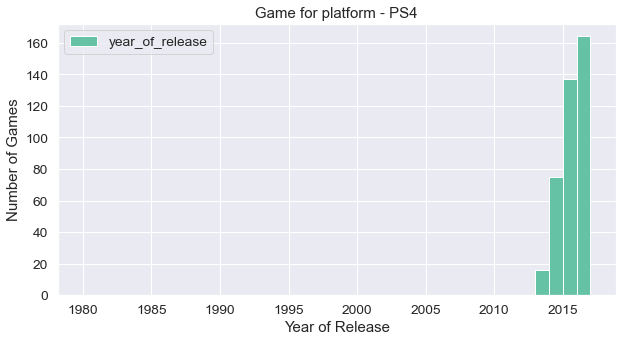

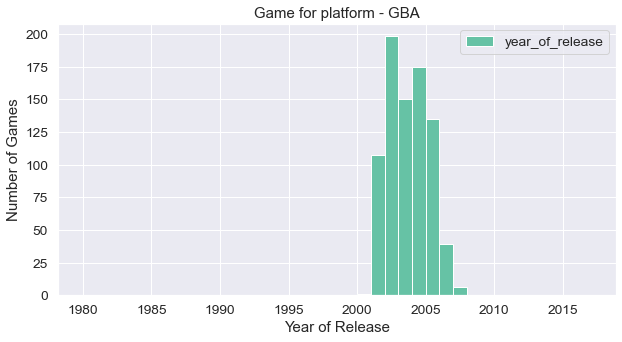

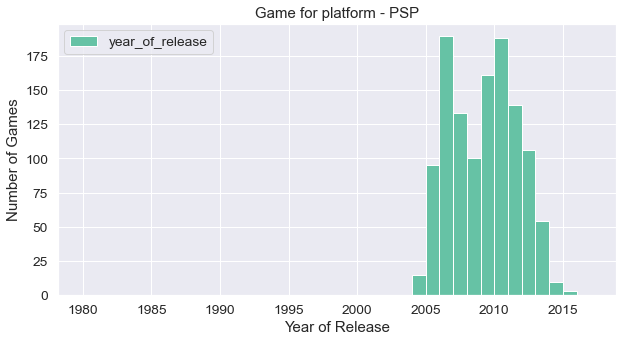

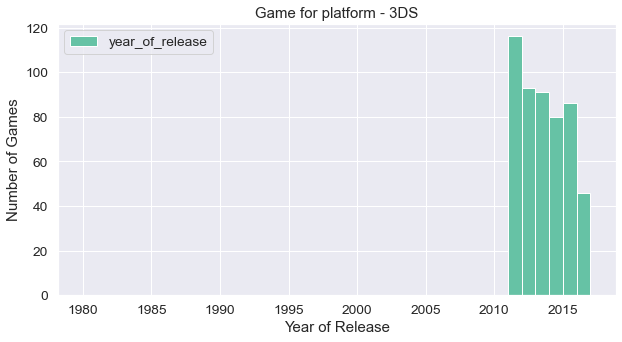

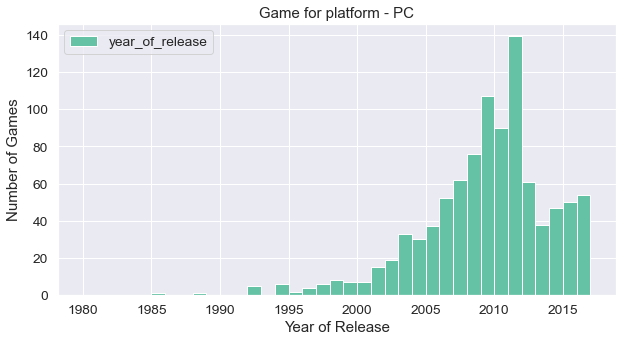

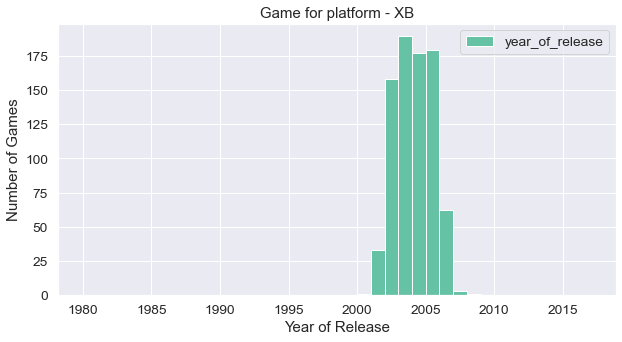

In [28]:
# Loop through the dictionary and display number of released games by year for each platform
for platform in top_platforms.index:
    df.loc[df['platform'] == platform]['year_of_release']\
    .plot(
        kind = 'hist',
        title = f'Game for platform - {platform}',
        range = (1980, 2017),
        bins = 37,
        figsize = (10, 5),
        grid = True,
        legend = True
    )
    plt.ylabel('Number of Games')
    plt.xlabel('Year of Release')
    plt.show()

From the distribution, it can be seen that the life cycle of a platform is approximately 5 to 10 years. Moreover, the most active phase usually lasts 2-5 years. The exception is PC (probably due to the possibility of an upgrade).

### Platform potential forecast for 2017

Since, as it was found out earlier, the life cycle of a platform in its most active phase is 2-5 years, to analyze the potential of platforms, we will take data for the previous 3 years (that is, from 2014 inclusive). Let's plot the global revenue distributions of all current platforms (that is, the platforms on which games have been released since 2014) by year and then take a look at the trends. If there is a downward trend, then most likely the future potential of the platform is small.  

We will look for platforms with upward or at least non-decreasing dynamics. In addition, we will keep in mind the total number of sales, not just trends.

In [29]:
# List of gaming platforms since 2006 in descending order of revenue
current_platforms = list(df[df['year_of_release'] >= 2014]\
                               .groupby('platform')['total_sales'].sum()\
                               .sort_values(ascending=False).index)

In [30]:
current_platforms

['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP']

There are 10 platforms of current interest. Let's look at the graphs of global sales by year for each of them.

In [31]:
df.loc[(df['platform'] == 'PS2')].groupby('year_of_release')['total_sales'].sum()

year_of_release
2000     39.17
2001    166.43
2002    205.38
2003    184.31
2004    211.81
2005    160.66
2006    103.42
2007     75.99
2008     53.90
2009     26.40
2010      5.64
2011      0.45
Name: total_sales, dtype: float64

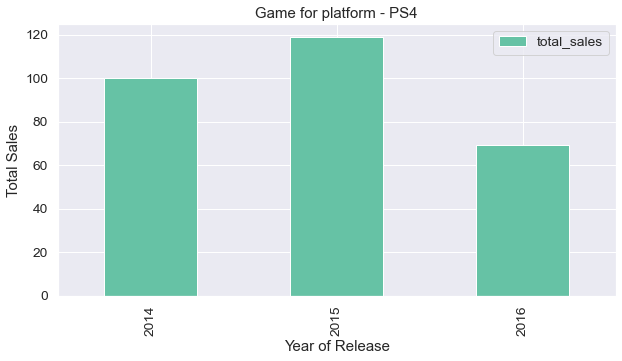

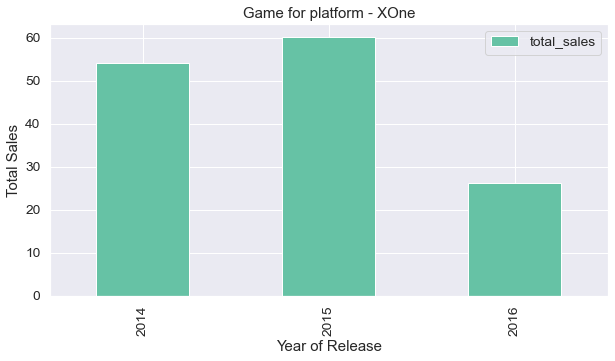

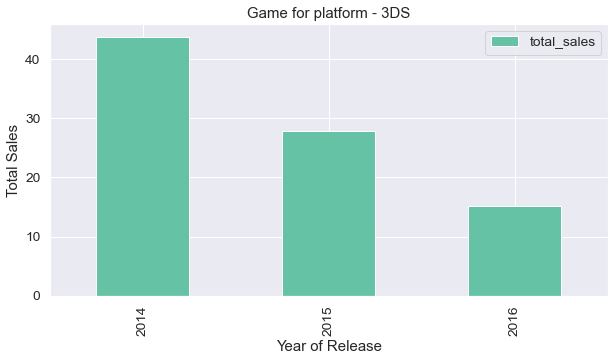

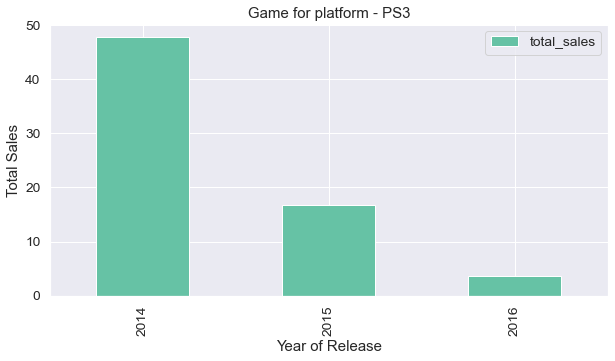

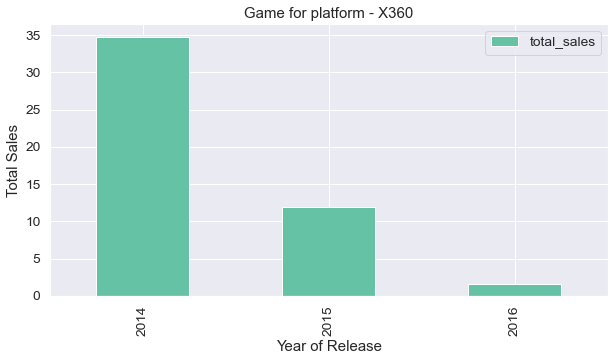

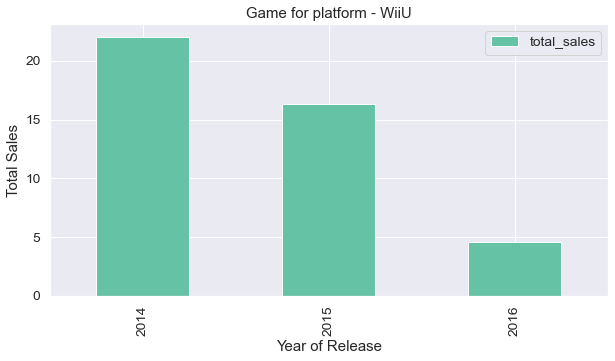

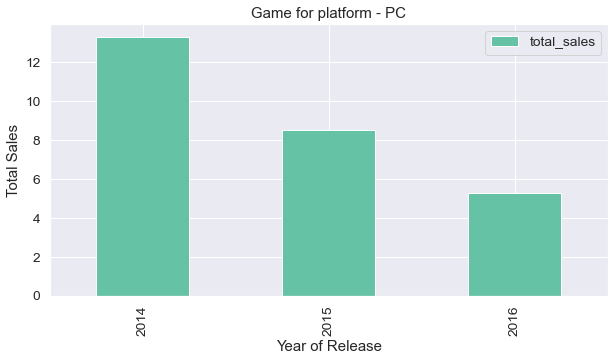

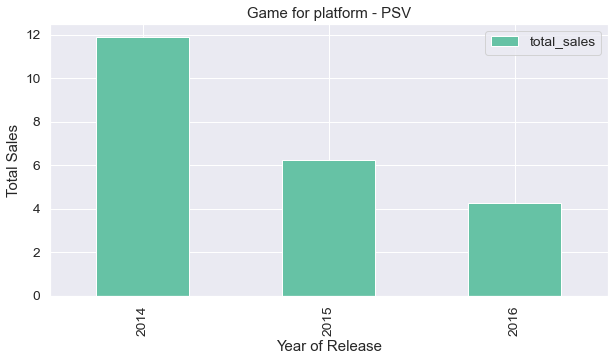

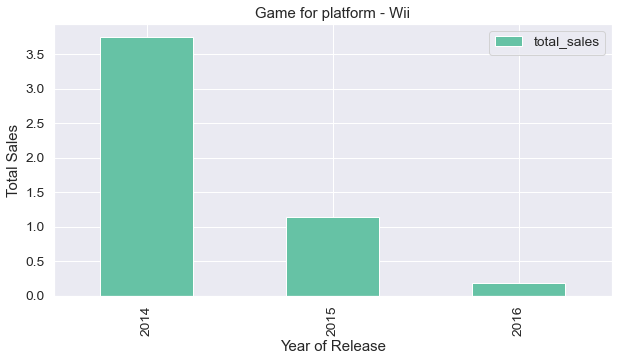

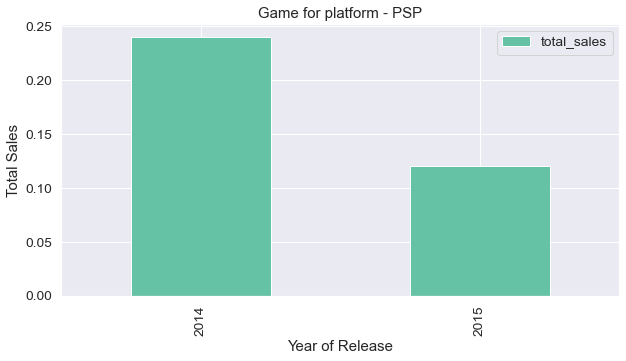

In [32]:
for platform in current_platforms:
    df.loc[(df['platform'] == platform) & (df['year_of_release'] >= 2014)].groupby('year_of_release')['total_sales'].sum()\
    .plot(
        x='year_of_release',
        y='total_sales',
        kind = 'bar',
        title = f'Game for platform - {platform}',
        figsize=(10, 5),
        grid = True,
        legend = True
    )
    plt.ylabel('Total Sales')
    plt.xlabel('Year of Release')
    plt.show()

For most platforms, we can see a decrease in sales. The PS4 platform is the leader in the number of sales. It is followed by XOne.  

It is assumed that there are no data for the second half of 2016. Thus, we can assume that sales for 2016 could potentially be about twice as much. For XOne, the projected number of sales for 2016 is about 50 million, for PS4 - about 140 million copies.  

Bearing in mind that 2016 data may not be complete, PS4 and XOne sales could potentially rise in 2017 as well.  

Also of interest may be the 3DS, PS3 and WiiU platforms. Despite the downward trend, due to the lack of data for 2016, expectations for these platforms are quite positive.  

The potential of the PC and PSV platforms, although small, is still there. They still have consumer demand.  

Let's write down a list of relevant platforms and take those whose total sales amounted to at least 3 million copies in an incomplete 2016.  

Let's write down a list of relevant platforms and take those whose total sales amounted to at least 3 million copies in an incomplete 2016.

In [33]:
current_platforms = [platform for platform in current_platforms if df.loc[(df['platform'] == platform)
                               & (df['year_of_release'] == 2016)]['total_sales'].sum() > 3]

Here are these platforms:

In [34]:
current_platforms

['PS4', 'XOne', '3DS', 'PS3', 'WiiU', 'PC', 'PSV']

### Distribution by sales for each platform

Let's make a boxplot of sales distribution by actual platforms.

(0.0, 1.6)

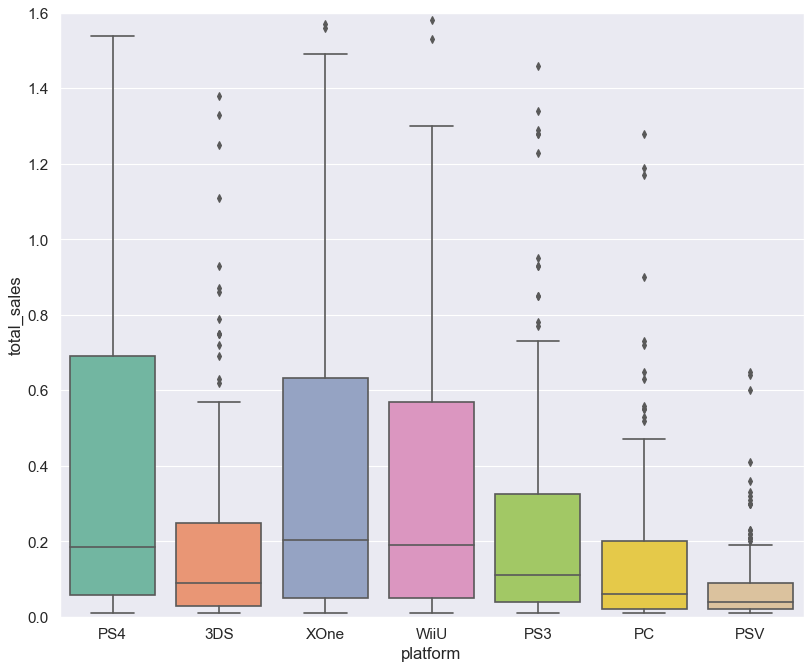

In [35]:
plt.figure(figsize=(12, 10), dpi=80)
sns.boxplot(data=df.loc[(df['platform'].isin(current_platforms)) & 
                        (df['year_of_release'] >= 2014)], y='total_sales', x='platform')
plt.ylim(0, 1.6)

In [36]:
df[(df['platform'].isin(current_platforms)) & 
   (df['year_of_release'] >= 2014)].pivot_table(index='platform', 
                                                values='total_sales', 
                                                aggfunc=['describe'])

describe                                                       
              25%    50%     75%  count    max      mean   min       std
platform                                                                
3DS        0.0300  0.090  0.2500  212.0  11.68  0.408868  0.01  1.188368
PC         0.0200  0.060  0.2000  151.0   3.05  0.179139  0.01  0.329359
PS3        0.0400  0.110  0.3250  219.0   5.27  0.311324  0.01  0.633059
PS4        0.0575  0.185  0.6900  376.0  14.63  0.766356  0.01  1.614969
PSV        0.0200  0.040  0.0900  295.0   1.96  0.075932  0.01  0.141591
WiiU       0.0500  0.190  0.5700   73.0   7.09  0.588767  0.01  1.161467
XOne       0.0500  0.205  0.6325  228.0   7.39  0.615614  0.01  1.046513

Games on the XOne, WiiU, and PS4 platforms have similar median sales figures of 205, 190, and 185,000 copies, respectively. These are the most profitable platforms.  

Next in descending order are PS3 (110K), 3DS (90K), PC (60K), PSV (40K)

### The dependence of the number of sales on user ratings and critic ratings

Exploring the correlation of user and critic ratings with game sales using the example of the most popular (and currently still relevant) gaming platform PS3.

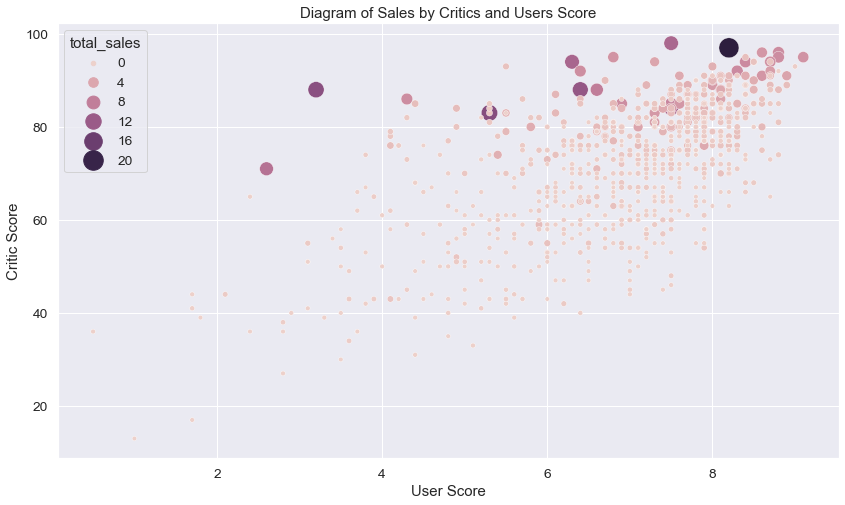

In [37]:
sns.scatterplot(data = df.loc[df['platform'] == 'PS3'],
                x = "user_score",
                y = "critic_score", 
                hue = 'total_sales',
                size = "total_sales",
                sizes = (20, 400),
               )
plt.title('Diagram of Sales by Critics and Users Score', fontsize = 15)
plt.xlabel('User Score', fontsize = 15)
plt.ylabel('Critic Score', fontsize = 15)
plt.show()

In [38]:
df.loc[df['platform'] == 'PS3']['user_score'].corr(df.loc[df['platform'] == 'PS3']['total_sales'])

0.12841562938563006

The Pearson correlation coefficient tells us that there is practically no linear connection between user rating and sales. However, from the scatterplot, you can see that games with low user ratings do not sell well. And well-selling games are more common among those whose ratings are higher. Thus, it can be concluded that user ratings can influence sales, but limited. That is, a game with a poor user rating is likely to sell poorly, but a good rating does not guarantee high sales.

There are likely other, more important factors that affect game sales, such as the amount of advertising spend and other factors.

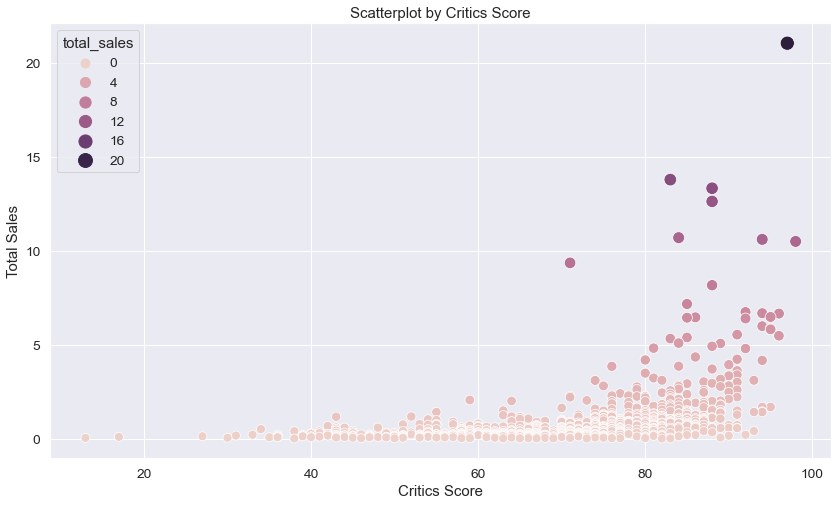

In [39]:
sns.scatterplot(data = df.loc[df['platform'] == 'PS3'],
                x = "critic_score",
                y = "total_sales", 
                hue = 'total_sales',
                size = "total_sales",
                sizes = (80, 200),
                
               )
plt.title('Scatterplot by Critics Score', fontsize = 15)
plt.xlabel('Critics Score', fontsize = 15)
plt.ylabel('Total Sales', fontsize = 15)
plt.show()

In [40]:
df.loc[df['platform'] == 'PS3']['critic_score'].corr(df.loc[df['platform'] == 'PS3']['total_sales'])

0.4327589578997136

In the case of dependence of critical ratings and sales, Pearson's correlation coefficient is much higher. Which may indicate that the opinion of critics is more significant than the ratings of ordinary users.  

A similar distribution can be seen in the scatterplot. Sales of games with low critical acclaim are low. And well-selling games are more likely to be found among those with higher reviews from critics. Moreover, games with good critical ratings (>80) usually sell quite well, among such games there are few that sell poorly. Thus, we can conclude that game sales are positively affected mostly by high ratings from critics (80 points and above).

Exploring similar distributions for all top platforms

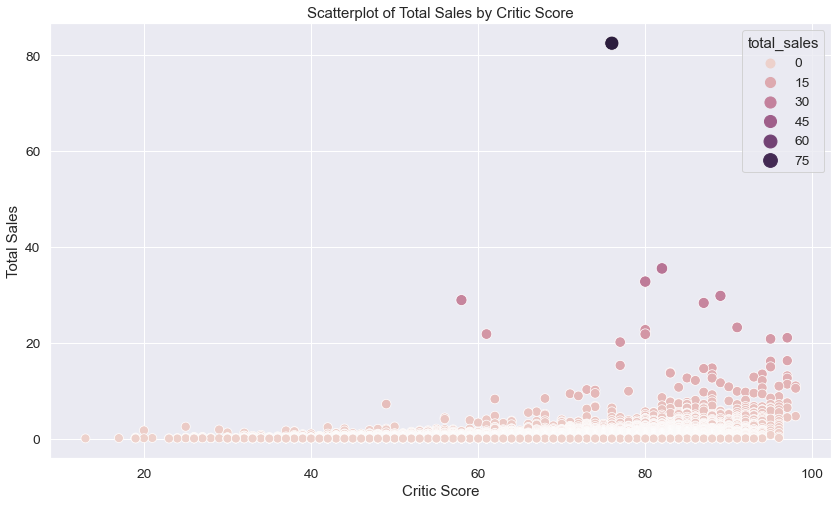

In [41]:
sns.scatterplot(data = df.loc[df['platform'].isin(top_platforms.index)],
                x = "critic_score",
                y = "total_sales", 
                hue = 'total_sales',
                size = "total_sales",
                sizes = (80, 200),
               )
plt.title('Scatterplot of Total Sales by Critic Score', fontsize = 15)
plt.xlabel('Critic Score', fontsize = 15)
plt.ylabel('Total Sales', fontsize = 15)
plt.show()

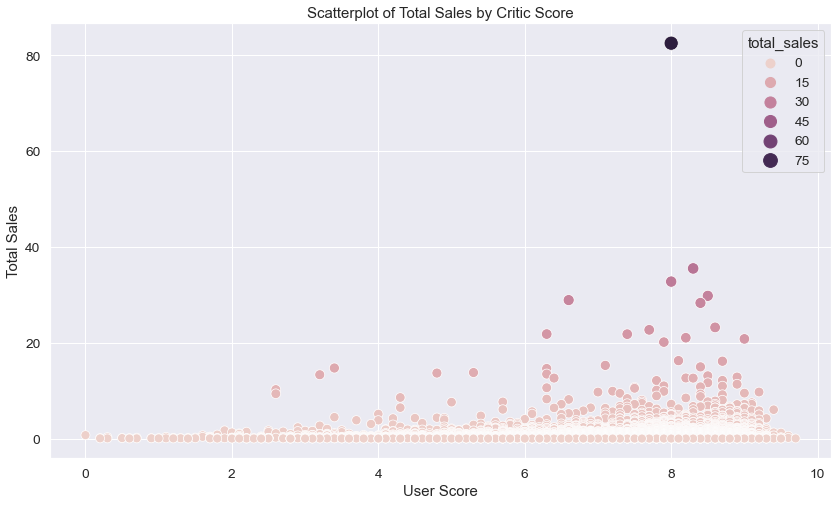

In [42]:
sns.scatterplot(data = df.loc[df['platform'].isin(top_platforms.index)],
                x = 'user_score',
                y = 'total_sales', 
                hue = 'total_sales',
                size = 'total_sales',
                sizes = (80, 200),
               )
plt.title('Scatterplot of Total Sales by Critic Score', fontsize = 15)
plt.xlabel('User Score', fontsize = 15)
plt.ylabel('Total Sales', fontsize = 15)
plt.show()

In general, the situation is similar at all other top platforms - the dependence of the number of sales on high ratings from critics is more pronounced than on the ratings of individual users.

### Profitability of games depending on the genre for current gaming platforms

Let's look at the distribution of games by genre. Consider global sales, as well as the number of released games for current platforms.

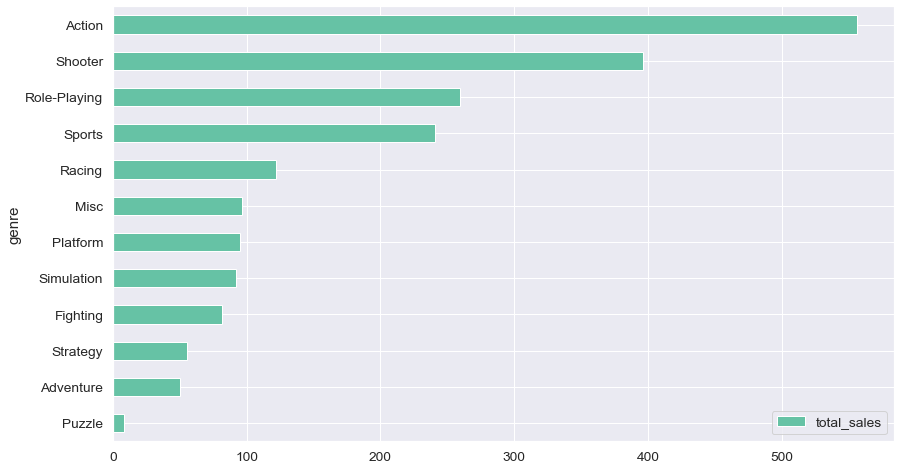

In [43]:
df[df['platform'].isin(current_platforms)] \
    .pivot_table(index='genre', values='total_sales', aggfunc='sum')\
    .sort_values(by='total_sales').plot(kind='barh');

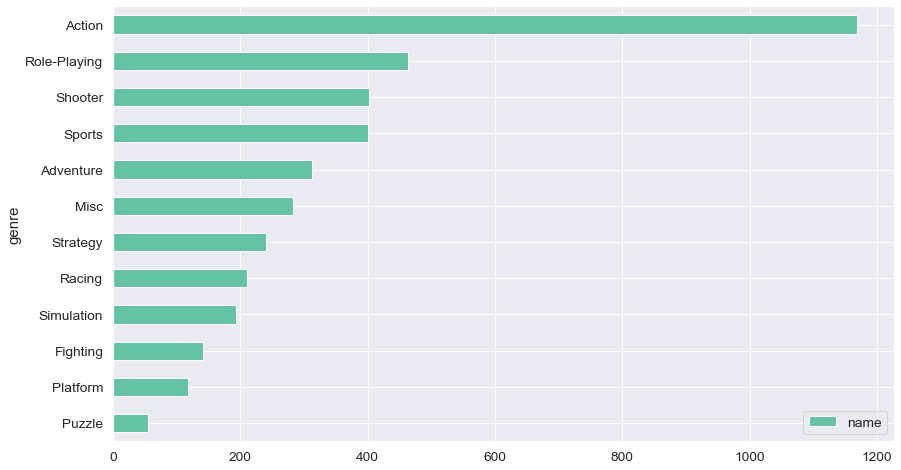

In [44]:
df[df['platform'].isin(current_platforms)] \
    .pivot_table(index='genre', values='name', aggfunc='count') \
    .sort_values(by='name').plot(kind='barh');

The Action genre leads in terms of the number of sales, followed by Shooter. Closes the top three sales leaders Role-Playing. If you look at the number of released games, the distribution here is somewhat different. Action is also in first place, but the number of released shooters is less than role-playing games.

Let's calculate the average profitability for each of the genres (divide the total number of sales by the number of released games).

In [45]:
df[df['platform'].isin(current_platforms)].groupby('genre') \
    .apply(lambda group: group['total_sales'].sum()/group['name'].count()) \
    .sort_values(ascending=False)

genre
Shooter         0.985547
Platform        0.805254
Sports          0.600923
Fighting        0.580213
Racing          0.579479
Role-Playing    0.559655
Action          0.475959
Simulation      0.474124
Misc            0.342155
Strategy        0.228631
Adventure       0.160769
Puzzle          0.153455
dtype: float64

The most profitable genre is Shooter (986,000 copies sold), followed by Platform - 805,000 copies per released game. On the third Sports 601 thousand copies sold.

The least profitable genres were Strategy, Adventure and Puzzle: 229, 161 and 153 thousand copies respectively.

### Conclusions

During the analysis, the following conclusions were made:  

- The vast majority of games were released after 1994. The peak of sales came in 2006-2007. Then followed a decline in sales.  
- The average life cycle of the world platform is 5-10 years, with the most active phase usually lasting up to 5 years.
- The most profitable platforms are XBox One, WiiU and PS4.
- Games on the XOne, WiiU, and PS4 platforms have similar median sales figures of 205, 190, and 185,000 copies, respectively. These are the most profitable platforms. Next in descending order are PS3 (110K), 3DS (90K), PC (60K), PSV (40K)
- User ratings can affect sales, but to a limited extent. That is, a game with a poor user rating is likely to sell poorly, but a good rating does not guarantee high sales. Critics' ratings have a greater impact on game sales. Games with good critical ratings (>80) tend to sell fairly well, and there are few such games that sell poorly. Thus, we can conclude that game sales are positively affected mainly by high ratings from critics (80 points and above).
- The most profitable genre is Shooter (986,000 copies sold), followed by Platform - 805,000 copies per released game. On the third Sports 601 thousand copies sold.
- The least profitable genres were Strategy, Adventure and Puzzle: 229, 161 and 153 thousand copies respectively.

## Drawing up a user profile depending on the region

### Most Popular Gaming Platforms by Major Regions

Let's build distribution diagrams for the best selling platforms for the current time period.

In [46]:
na_sales = df.loc[df['year_of_release'] >= 2014] \
    .pivot_table(index='platform', values=['na_sales'], aggfunc='sum') \
    .sort_values(by='na_sales', ascending=False).head(5)['na_sales']

eu_sales = df.loc[df['year_of_release'] >= 2014] \
    .pivot_table(index='platform', values=['eu_sales'], aggfunc='sum') \
    .sort_values(by='eu_sales', ascending=False).head(5)['eu_sales']

jp_sales = df.loc[df['year_of_release'] >= 2014] \
    .pivot_table(index='platform', values=['jp_sales'], aggfunc='sum') \
    .sort_values(by='jp_sales', ascending=False).head(5)['jp_sales']

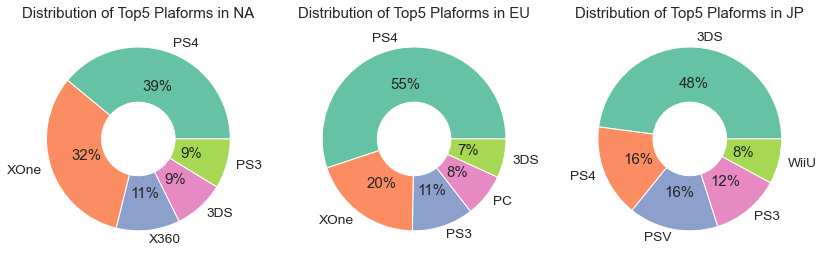

In [47]:
fig, axes = plt.subplots(1, 3)

for i, market in enumerate([na_sales, eu_sales, jp_sales]):
    axes[i].pie(market, labels=market.index, autopct='%1.0f%%', wedgeprops=dict(width=0.6, edgecolor='w'))
    axes[i].set_title(f'Distribution of Top5 Plaforms in {market.name[:2].upper()}', fontsize = 15)
    
plt.show()

In [48]:
df.loc[df['year_of_release'] >= 2014].pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum', margins=True, margins_name='Total').sort_values(by='jp_sales', ascending=False)

,eu_sales,jp_sales,na_sales
platform,,,
Total,270.68,93.09,284.06
3DS,16.12,44.24,22.64
PS4,130.04,15.02,98.61
PSV,3.53,14.54,2.52
PS3,25.54,11.22,22.05
WiiU,13.15,7.31,19.36
PSP,0.00,0.36,0.00
XOne,46.25,0.32,81.27
X360,15.49,0.08,28.30


In the North American market, the most popular platforms over the past 3 years are PS4 and XOne, their shares account for up to a third of the total market for each platform. This is followed by X360, PS3 and 3DS occupying approximately equal shares.  

In the European market, more than half of sales are PS4. Further XOne occupies 17%. Then come PS3, 3DS and PC.  

In Japan, the 3DS platform takes up almost half of the market, followed by PS3 and PSV (about 15% each). Close TOP5 PS3 and WiiU.


### Most Popular Genres by Region¶

In [49]:
na_genres_sales = df.loc[df['year_of_release'] >= 2014] \
    .pivot_table(index='genre', values=['na_sales'], aggfunc='sum') \
    .sort_values(by='na_sales', ascending=False).head(5)['na_sales']

eu_genres_sales = df.loc[df['year_of_release'] >= 2014] \
    .pivot_table(index='genre', values=['eu_sales'], aggfunc='sum') \
    .sort_values(by='eu_sales', ascending=False).head(5)['eu_sales']

jp_genres_sales = df.loc[df['year_of_release'] >= 2014] \
    .pivot_table(index='genre', values=['jp_sales'], aggfunc='sum')\
    .sort_values(by='jp_sales', ascending=False).head(5)['jp_sales']

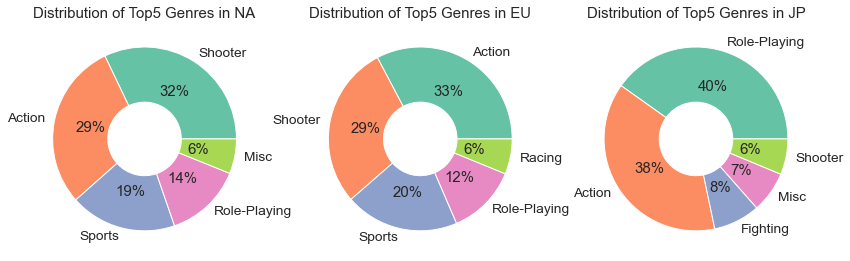

In [50]:
fig, axes = plt.subplots(1, 3)

for i, market in enumerate([na_genres_sales, eu_genres_sales, jp_genres_sales]):
    axes[i].pie(market, labels=market.index, autopct='%1.0f%%', wedgeprops=dict(width=0.6, edgecolor='w'))
    axes[i].set_title(f'Distribution of Top5 Genres in {market.name[:2].upper()}', fontsize = 15)

plt.show()

In [51]:
df.loc[df['year_of_release'] >= 2011].pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum', margins=True, margins_name='Total').sort_values(by='na_sales', ascending=False)

,eu_sales,jp_sales,na_sales
genre,,,
Total,669.79,245.65,829.76
Action,199.12,63.62,230.92
Shooter,148.02,11.92,194.43
Sports,88.48,11.09,108.70
Role-Playing,62.30,79.87,83.78
Misc,39.72,17.60,69.69
Platform,30.07,12.13,38.28
Racing,40.58,5.64,31.98
Fighting,16.24,12.38,31.63


In the North American market, the most popular genres are Action and Shooter (more than half of all sales). Next Sports, Role-Playing and Misc.  

In Europe the situation is very similar. The Action, Shooter and Sports genres are in the lead, followed by Role-Playing, and Racing closes the top five.  

In the Japanese market, the situation is significantly different. The most popular genres are Role-Playing and Action (33% and 26% of the market). The total share of the remaining three Misc Fighting AND Shooter is small, about 17%.  


### The impact of the ESRB rating on sales in a particular region for the current period of time

Distributions by ESRB ratings for the main sales regions.

In [52]:
esrb_data = df.loc[df['year_of_release'] >= 2014].groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

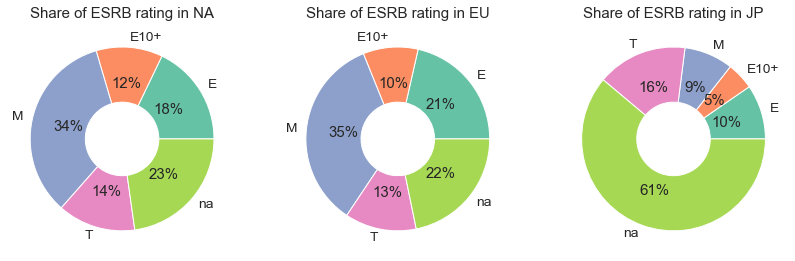

In [53]:
fig, axes = plt.subplots(1, 3)

for i, market in enumerate(['na_sales', 'eu_sales', 'jp_sales']):
    axes[i].pie(esrb_data[market], labels=esrb_data.index, autopct='%1.0f%%', wedgeprops=dict(width=0.6, edgecolor='w'))
    axes[i].set_title(f'Share of ESRB rating in {market[:2].upper()}', fontsize = 15)

plt.show()

In [54]:
df.loc[df['year_of_release'] >= 2014].pivot_table(index='rating', 
                                                  values=['na_sales', 'eu_sales', 'jp_sales'], 
                                                  aggfunc='sum', 
                                                  margins=True, 
                                                  margins_name='Total')

,eu_sales,jp_sales,na_sales
rating,,,
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.44,8.01,96.42
T,34.07,14.78,38.95
na,58.95,56.90,64.72
Total,270.68,93.09,284.06


The distribution of ratings for the North American and European regions is almost identical. Most (about a third) of all sales in them are for games with an M rating, that is, for people over 17 years old. One sixth is E-rated (games for all ages). And the rest of the market share is E10+ and T ratings (games for people 10 and 13 years old respectively). Unrated games make up just under a quarter of all sales. The share of games with other markets is insignificant and amounts to less than 1 percent of sales.

The distribution of sales by rating in the Japanese market is very different. More than half of all games are unrated games. Next, the most popular games are rated T (about 15%), E (about 10%), M (9%), E10+ (5%). The share of games with other ratings is also insignificant.

### Conclusions

During the analysis of the user portrait of each of the main sales regions, the following conclusions were drawn:  
 
- Most popular platforms by region:  
  - In the North American market, the most popular platforms over the past 3 years are PS4 and XOne, their shares account for up to a third of the total market for each platform. This is followed by X360, PS3 and 3DS occupying approximately equal shares.
  - In the European market, more than half of sales are PS4. Further XOne occupies 17%. Then come PS3, 3DS and PC.  
  - In Japan, the 3DS platform takes up almost half of the market, followed by PS3 and PSV (about 15% each). Close TOP5 PS3 and WiiU.  


- The most popular genres among users by region:  
  - In the North American market, the most popular genres are Action and Shooter (more than half of all sales). Next Sports, Role-Playing and Misc.  
  - In Europe the situation is very similar. The Action, Shooter and Sports genres are in the lead, followed by Role-Playing, and Racing closes the top five.  
  - In the Japanese market, the situation is significantly different. The most popular genres are Role-Playing and Action (33% and 26% of the market). The total share of the remaining three Misc Fighting AND Shooter is small, about 17%.  
  

- Impact of the ESRB rating
  - The distribution of ratings for the North American and European regions is almost identical. Most (about a third) of all sales in them are for games with an M rating, that is, for people over 17 years old. One sixth is E-rated (games for all ages). And the rest of the market share is E10+ and T ratings (games for people 10 and 13 years old respectively). Unrated games make up just under a quarter of all sales. The share of games with other markets is insignificant and amounts to less than 1 percent of sales.
  - The distribution of sales by rating in the Japanese market is very different. More than half of all games are unrated games. Next, the most popular games are rated T (about 15%), E (about 10%), M (9%), E10+ (5%). The share of games with other ratings is also insignificant.
  - As a summary, we can conclude that the users of the North American and European markets have many similarities, while the users of the Japanese market are quite different, with the Japanese market having a very high proportion of unrated games.

### Hypothesis testing

#### Testing the Hypothesis of Equal Average User Ratings for XBox One and PC Platforms

The null hypothesis states: "The average user ratings of the XBox One and PC platforms are equal." The alternative hypothesis states "The average user ratings of the XBox One and PC platforms are not equal". Let's take the data for the current period of time (since 2014) and calculate the p level of significance for the two populations of each of the platforms.  

Let's set the significance level criterion alpha to 0.05. If the calculated p level of significance is greater than alpha, then we cannot reject the null hypothesis. If less, then the null hypothesis can be rejected.  

You also need to look at the size of each of the wedges.  

In [55]:
xbox_user_score = df.loc[(df['platform'] == 'XOne') & (df['user_score'].isna() == False)\
                         & (df['year_of_release']>=2014)]['user_score']

In [56]:
xbox_user_score.describe()

count    165.000000
mean       6.594545
std        1.375139
min        1.600000
25%        5.800000
50%        6.800000
75%        7.600000
max        9.200000
Name: user_score, dtype: float64

In [57]:
pc_user_score = df.loc[(df['platform'] == 'PC') & (df['user_score'].isna() == False)\
                       & (df['year_of_release']>=2014)]['user_score']

In [58]:
pc_user_score.describe()

count    122.000000
mean       6.298361
std        1.703278
min        1.400000
25%        5.325000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

The size of our two samples is different. Calculate the p-value of significance for two independent samples. When calculating, we take into account that our samples are not equal in size.

In [59]:
results = st.ttest_ind(xbox_user_score, pc_user_score, equal_var=False)

In [60]:
results.pvalue

0.11601398086668832

P-value significantly exceeds the alpha criterion. We cannot reject the null hypothesis. So, we can conclude that the average user ratings for the PC and XBox One platforms are equal.

In [61]:
pc_xbox_ur = df.loc[((df['platform'].isin(['XOne', 'PC'])) & ~(df['user_score'].isna()) & (df['year_of_release']>=2014))][['user_score', 'platform']]

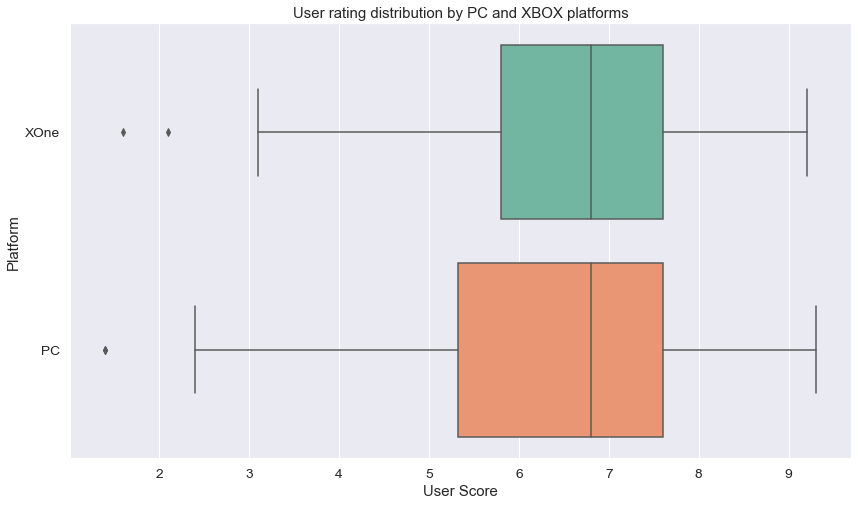

In [62]:
sns.boxplot(data=pc_xbox_ur, x='user_score', y='platform')
plt.title('User rating distribution by PC and XBOX platforms', fontsize = 15)
plt.xlabel('User Score', fontsize = 15)
plt.ylabel('Platform', fontsize = 15)
plt.show()

We can also illustrate this with a boxplot distribution. The mean of the two samples is the same.

#### Testing the hypothesis that the average user ratings of the Action and Sports genres are different

We formulate the null hypothesis as follows: "The average user ratings of the Action and Sports genres are equal." The alternative hypothesis states "Average user ratings for the Action and Sports genres are not equal." Let's take the data for the current period of time (since 2014) and calculate the p level of significance for two populations of each genre.  

Let's set the significance level criterion alpha to 0.05. If the calculated p level of significance is greater than alpha, then we cannot reject the null hypothesis. If less, then the null hypothesis can be rejected. And accept the alternative hypothesis.  

You also need to look at the size of each of the wedges.  

In [63]:
action_uc = df.loc[(df['genre'] == 'Action') & (df['user_score'].isna() == False)\
                   & (df['year_of_release']>=2014)]['user_score']

In [64]:
sports_uc = df.loc[(df['genre'] == 'Sports') & (df['user_score'].isna() == False)\
                   & (df['year_of_release']>=2014)]['user_score']

In [65]:
action_uc.describe()

count    297.000000
mean       6.760606
std        1.377852
min        2.000000
25%        6.100000
50%        7.100000
75%        7.700000
max        9.000000
Name: user_score, dtype: float64

In [66]:
sports_uc.describe()

count    127.000000
mean       5.225197
std        1.856604
min        0.200000
25%        4.000000
50%        5.500000
75%        6.650000
max        8.800000
Name: user_score, dtype: float64

In [67]:
sports_uc.mean()

5.225196850393697

The size of our two samples is different. Calculate the p level of significance for two independent samples. When calculating, we take into account that our samples are not equal in size.

In [68]:
results = st.ttest_ind(action_uc, sports_uc, equal_var=False)

In [69]:
results

Ttest_indResult(statistic=8.384614718486121, pvalue=1.1825550382644557e-14)

P-value criterion is much less than alpha criterion. We reject the null hypothesis and accept the alternative hypothesis. Thus, we can conclude that the average user ratings of the Action and Sports genres are different.

In [70]:
action_sport_ur = df.loc[(df['genre'].isin(['Action', 'Sports'])) & ~(df['user_score'].isna()) & \
       (df['year_of_release']>=2014)][['user_score', 'genre']]

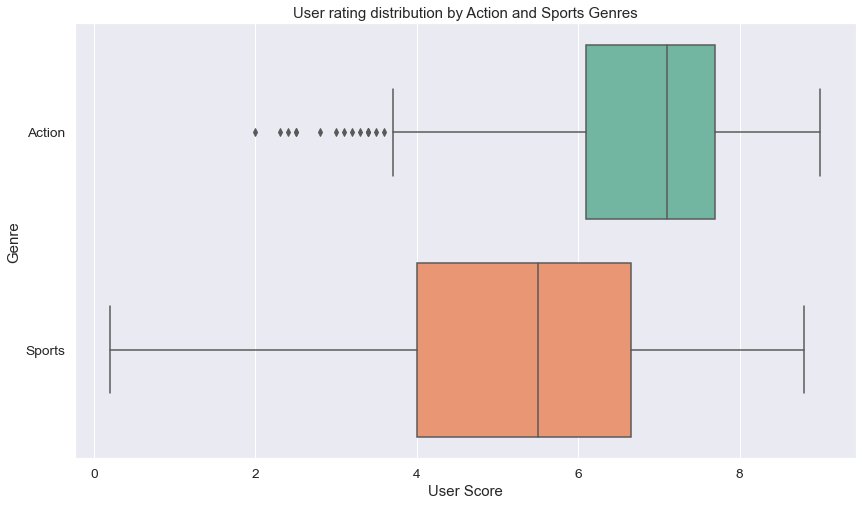

In [71]:
sns.boxplot(data=action_sport_ur, x='user_score', y='genre')
plt.title('User rating distribution by Action and Sports Genres', fontsize = 15)
plt.xlabel('User Score', fontsize = 15)
plt.ylabel('Genre', fontsize = 15)
plt.show()

It can be easily seen the difference on boxplots also.

#### Conclusion

- The hypothesis about the equality of the average user ratings of the XBox One and PC platforms was confirmed by the study  
- The hypothesis that the average user ratings of the Action and Sports genres are different was also confirmed during the study.

### Final conclusion

1. In the process of reviewing the data, gaps in six columns were found in the dataset. Some columns have incorrect data types. Two columns contain incorrect data types.  


2. During the data preprocessing, the necessary data transformations were carried out (renaming columns, changing data types), the data was checked for duplicates. A small part of data with gaps was removed (less than 2%). The gaps in the rankings were filled with the value 'na'. For the rest of the data with gaps, it was decided to leave the gaps as they are. Global sales data has also been added.  


3. During the analysis, the following conclusions were made:
  - The vast majority of games were released after 1994. The peak of sales came in 2006-2007. Then followed a decline in sales.  
  - The average life cycle of the world platform is 5-10 years, with the most active phase usually lasting up to 5 years.  
  - The most profitable platforms are XBox One, WiiU and PS4.  
  - Games on the XOne, WiiU, and PS4 platforms have similar median sales figures of 205, 190, and 185,000 copies, respectively. These are the most profitable platforms. Next in descending order are PS3 (110K), 3DS (90K), PC (60K), PSV (40K)  
  - User ratings can affect sales, but to a limited extent. That is, a game with a poor user rating is likely to sell poorly, but a good rating does not guarantee high sales. Critics' ratings have a greater impact on game sales. Games with good critical ratings (>80) tend to sell fairly well, and there are few such games that sell poorly. Thus, we can conclude that game sales are positively affected mainly by high ratings from critics (80 points and above).  
  - The most profitable genre is Shooter (986,000 copies sold), followed by Platform - 805,000 copies per released game. On the third Sports 601 thousand copies sold.  
  - The least profitable genres were Strategy, Adventure and Puzzle: 229, 161 and 153 thousand copies respectively.  


4. Portraits of the average user of each of the main sales regions were analyzed. During the analysis of the user portrait of each of the main sales regions, the following conclusions were drawn:  

  - Most popular platforms by region:
    - In the North American market, the most popular platforms over the past 3 years are PS4 and XOne, their shares account for up to a third of the total market for each platform. This is followed by X360, PS3 and 3DS occupying approximately equal shares.
    - In the European market, more than half of sales are PS4. Further XOne occupies 17%. Then come PS3, 3DS and PC.
    - In Japan, the 3DS platform takes up almost half of the market, followed by PS3 and PSV (about 15% each). Close TOP5 PS3 and WiiU.
    
  - The most popular genres among users by region:  
    - In the North American market, the most popular genres are Action and Shooter (more than half of all sales). Next Sports, Role-Playing and Misc.  
    - In Europe the situation is very similar. The Action, Shooter and Sports genres are in the lead, followed by Role-Playing, and Racing closes the top five.  
    - In the Japanese market, the situation is significantly different. The most popular genres are Role-Playing and Action (33% and 26% of the market). The total share of the remaining three Misc Fighting AND Shooter is small, about 17%.  


  - Impact of the ESRB rating
    - The distribution of ratings for the North American and European regions is almost identical. Most (about a third) of all sales in them are for games with an M rating, that is, for people over 17 years old. One sixth is E-rated (games for all ages). And the rest of the market share is E10+ and T ratings (games for people 10 and 13 years old respectively). Unrated games make up just under a quarter of all sales. The share of games with other markets is insignificant and amounts to less than 1 percent of sales.  
    - The distribution of sales by rating in the Japanese market is very different. More than half of all games are unrated games. Next, the most popular games are rated T (about 15%), E (about 10%), M (9%), E10+ (5%). The share of games with other ratings is also insignificant.  
    - As a summary, we can conclude that the users of the North American and European markets have many similarities, while the users of the Japanese market are quite different, with the Japanese market having a very high proportion of unrated games.  

5. The following hypotheses were tested  
  - The hypothesis about the equality of the average user ratings of the XBox One and PC platforms was confirmed by the study.
  - The hypothesis that the average user ratings of the Action and Sports genres are different was also confirmed during the study.  


### Recommendations
- Missings in the data. Pay attention to this point when collecting data in the future, especially in the categories of year of release, user and critic ratings, and age rating.
- The number of sales of games for different platforms can vary greatly. It makes sense to focus on the most relevant and profitable. At the moment, the Play Station 4 and XBox One platforms have the greatest potential. You should also monitor the market dynamics in the future to find other potentially profitable platforms.
- It should be paid particular attention to games with a critic rating of 80 or more.
- It is worth focusing on the most profitable genres - Action and Platform.
- When planning advertising campaigns, one should take into account the characteristics of various markets (type of gaming platform, genre and age rating)